Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.

Dataset
Use the Iris dataset available in the sklearn library.

Key components to be fulfilled :

1) Loading and Preprocessing 
Load the Iris dataset from sklearn.
Drop the species column since this is a clustering problem.

2) Clustering Algorithm Implementation 
Implement the following two clustering algorithms:

A) KMeans Clustering 
Provide a brief description of how KMeans clustering works.
Explain why KMeans clustering might be suitable for the Iris dataset.
Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

B) Hierarchical Clustering
Provide a brief description of how Hierarchical clustering works.
Explain why Hierarchical clustering might be suitable for the Iris dataset.
Apply Hierarchical clustering to the preprocessed Iris dataset and visualize the clusters.


In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

In [7]:
# Convert to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species column (target) to the DataFrame for reference
iris_df['species'] = iris.target

# Drop the species column
iris_df_clustering = iris_df.drop('species', axis=1)

# Display the first few rows of the modified DataFrame
print(iris_df_clustering.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Clustering Algorithm Implementation

A) KMeans Clustering

KMeans clustering is an iterative algorithm that divides the unlabelled dataset into 'k' different clusters
in such a way that each dataset belongs only one group that has similar properties.

Group similar data points together and discover underlying patterns.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The aim of this algorithm
is to minimize the sum of distances between the data point and their corresponding clusters.

Define a target number 'k', which refers to the number of centroids need in the dataset, then kmeans algorithm allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

K-Means relies on Euclidean distance to measure similarity. All features in the Iris dataset are numeric, making it ideal for K-Means, 
which struggles with categorical data.

The Iris dataset has three species, which aligns well with K-Means' requirement of specifying the number of clusters (k) in advance.
We can set k=3 and expect reasonable clustering results.

In [10]:
# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_df_clustering)

In [12]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [13]:
# Predicted clusters
clusters = kmeans.labels_
clusters

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# Use PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [17]:
# Create a DataFrame for visualization
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Cluster'] = clusters

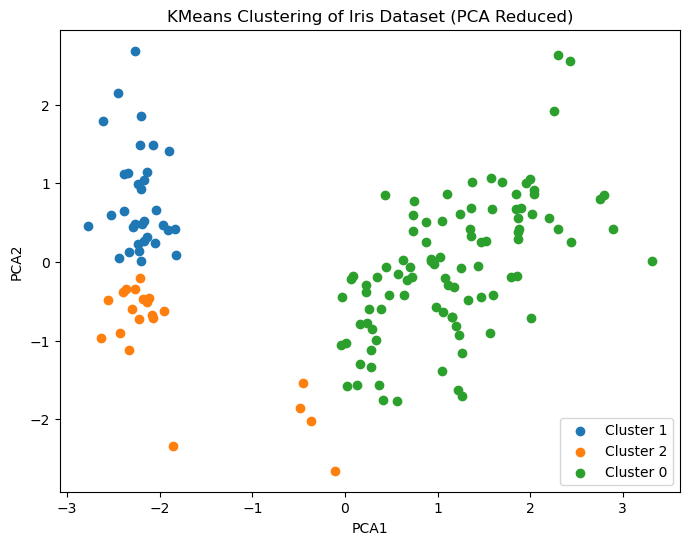

In [18]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering of Iris Dataset (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
B) Hierarchical Clustering

Hierarchical Clustering creates a tree like hierarchy of clusters in a given dataset.

It is a connectivity-based clustering model that groups the data points together that are close to each other 
based on the measure of similarity or distance.

Here, it develops the hierarchy of clusters in the form of a tree and this tree shaped structure is known as dendogram.

Hierarchical Clustering can better handle the overlaps by analyzing distances at multiple levels.

Unlike KMeans, Hierarchical Clustering does not require specifying the number of clusters (k) in advance.

In [20]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

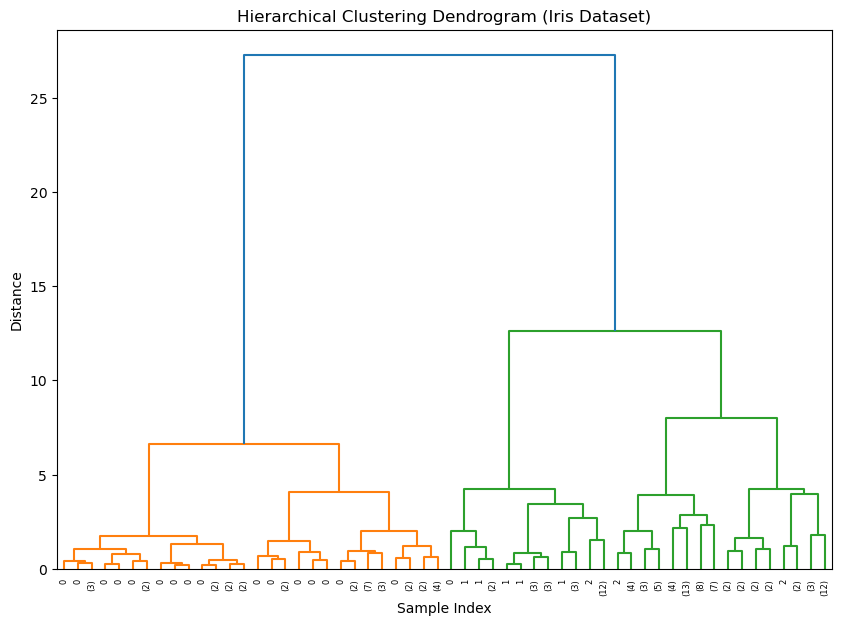

In [21]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='level', p=5, labels=iris.target)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()